### Problem

**In this program, we have implemented a model to predict whether a customer will buy the product or not based on previous purchase history**


### Team
* [Ankur Rokad](https://github.com/ankurrokad)
* Arathy Ajith
* Rincy Jose
* Akhilesh Muthusamy
* Antony Yesudas

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

# Importing Dataset

In [2]:
adds = pd.read_csv('Social_Network_Ads.csv')
adds.head(9)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0


In [3]:
adds.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
features = ['Age','EstimatedSalary']

In [5]:
adds.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [6]:
adds.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Feature Selection

In [7]:
corr = adds.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

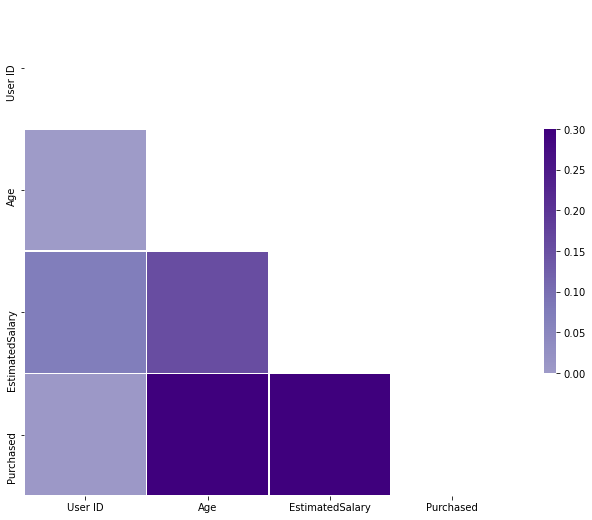

In [8]:
figure, ax = plt.subplots(figsize = (11,9))
sb.heatmap(corr, mask=mask, cmap='Purples', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Purchased          1.000000
Age                0.622454
EstimatedSalary    0.362083
User ID            0.007120
Name: Purchased, dtype: float64


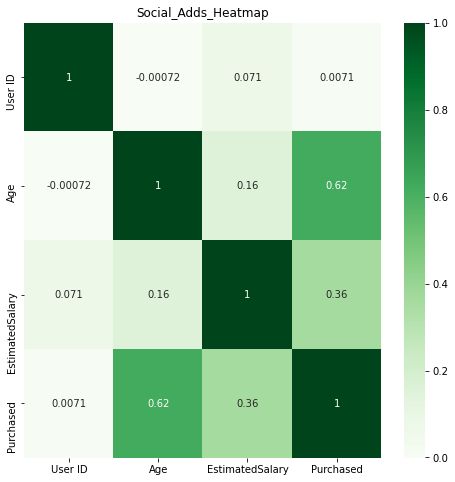

In [9]:
corr_matrix = adds.corr()
addscorr = corr_matrix['Purchased'].sort_values(ascending = False)
print(addscorr)
figure, ax = plt.subplots(figsize = (8, 8))
#print(figure, ax)
plt.title("Social_Adds_Heatmap")
sb.heatmap(corr_matrix, annot = True, cmap='Greens')

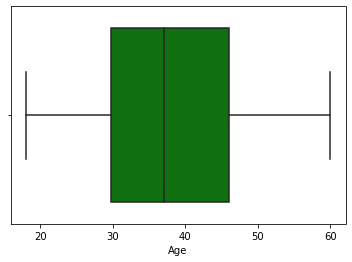

In [10]:
sb.boxplot(x=adds['Age'], color= 'Green')

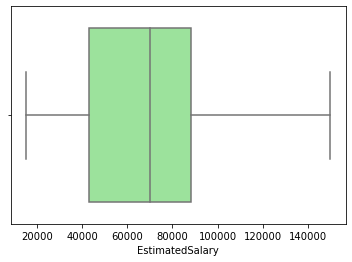

In [11]:
sb.boxplot(x=adds['EstimatedSalary'], color= 'lightgreen')

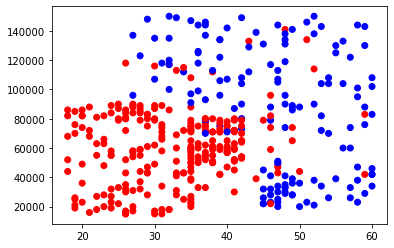

In [12]:
marker_colors = adds['Purchased'].replace([0, 1],['r', 'b'])
plt.scatter(adds['Age'], adds['EstimatedSalary'], c=marker_colors)
plt.show()

In [13]:
x = adds.iloc[:, [2,3]].values
y = adds.iloc[:, -1].values
print(x.shape, y.shape)

(400, 2) (400,)


# Splitting Dataset into Training and Testing

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

# Feature Scaling

In [15]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# 1- Logistic Regression

In [16]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [17]:
print(classifier.predict(sc.transform([[45,90000]])))

[1]


# Predicting train and test results

In [18]:
y_pred_train = classifier.predict(x_train)
y_pred = classifier.predict(x_test)
print(np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_pred),1)),1))

[[0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]


# Confusion Matrix, Accuracy, Classification Report - Training Set

In [19]:
cm_tr = confusion_matrix(y_train, y_pred_train)
score_tr = accuracy_score(y_train, y_pred_train)
cr_tr = classification_report(y_train,y_pred_train)
print("Confusion Matrix")
print(cm_tr)
print("Accuracy Score: ", score_tr)
print("Classification report")
print(cr_tr)

Confusion Matrix
[[185  17]
 [ 31  87]]
Accuracy Score:  0.85
Classification report
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       202
           1       0.84      0.74      0.78       118

    accuracy                           0.85       320
   macro avg       0.85      0.83      0.83       320
weighted avg       0.85      0.85      0.85       320



# Confusion Matrix - Visualization - Train Result

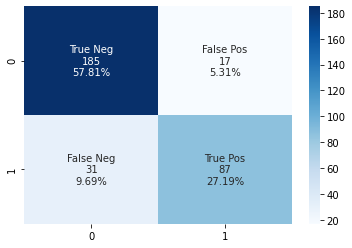

In [20]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm_tr.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm_tr.flatten()/np.sum(cm_tr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(cm_tr, annot=labels, fmt='', cmap='Blues')

# Confusion Matrix, Accuracy, Classification Report - Test Set

In [21]:
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test, y_pred)
cr = classification_report(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print("Accuracy Score: ", score)
print("Classification report")
print(cr)

Confusion Matrix
[[52  3]
 [ 8 17]]
Accuracy Score:  0.8625
Classification report
              precision    recall  f1-score   support

           0       0.87      0.95      0.90        55
           1       0.85      0.68      0.76        25

    accuracy                           0.86        80
   macro avg       0.86      0.81      0.83        80
weighted avg       0.86      0.86      0.86        80



# Confusion Matrix - Visualization - Test Result

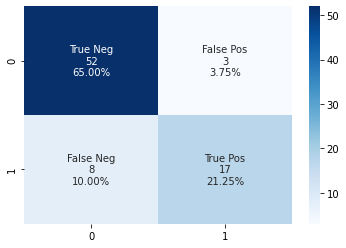

In [22]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(cm, annot=labels, fmt='', cmap='Blues')

# K-Fold cross validation- Logistic Regression - Training Set

In [23]:
Log_accuracy_tr = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(Log_accuracy_tr.mean(),Log_accuracy_tr.std()))

Mean Accuracy: 0.85, Std of Accuracy: 0.04


# K-Fold cross validation- Logistic Regression - Test Set

In [24]:
Log_accuracy = cross_val_score(estimator = classifier, X = x_test, y = y_test, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(Log_accuracy.mean(),Log_accuracy.std()))

Mean Accuracy: 0.85, Std of Accuracy: 0.09


# 2- K-Nearest Neighbours

In [25]:
knnclassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knnclassifier.fit(x_train, y_train)

KNeighborsClassifier()

# predictingTrain and Test results

In [26]:
y_pred_train = knnclassifier.predict(x_train)
y_pred = knnclassifier.predict(x_test)
print(np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_pred),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]


# Confusion Matrix, Accuracy, Classification Report- Training Set

In [27]:
kc_matrix_tr = confusion_matrix(y_train, y_pred_train)
k_score_tr = accuracy_score(y_train, y_pred_train)
k_cr_tr = classification_report(y_train,y_pred_train)
print("Confusion Matrix")
print(kc_matrix_tr)
print("Accuracy Score: ", k_score_tr)
print("Classification report")
print(k_cr_tr)

Confusion Matrix
[[186  16]
 [  9 109]]
Accuracy Score:  0.921875
Classification report
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       202
           1       0.87      0.92      0.90       118

    accuracy                           0.92       320
   macro avg       0.91      0.92      0.92       320
weighted avg       0.92      0.92      0.92       320



# Confusion Matrix - Visualization - Train Result

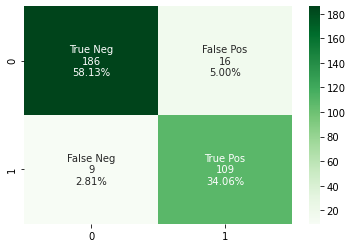

In [28]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in kc_matrix_tr.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in kc_matrix_tr.flatten()/np.sum(kc_matrix_tr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(kc_matrix_tr, annot=labels, fmt='', cmap='Greens')

# Confusion Matrix, Accuracy, Classification Report - Test Set

In [29]:
kc_matrix = confusion_matrix(y_test, y_pred)
k_score = accuracy_score(y_test, y_pred)
k_cr = classification_report(y_test,y_pred)
print("Confusion Matrix")
print(kc_matrix)
print("Accuracy Score: ", k_score)
print("Classification report")
print(k_cr)

Confusion Matrix
[[51  4]
 [ 3 22]]
Accuracy Score:  0.9125
Classification report
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        55
           1       0.85      0.88      0.86        25

    accuracy                           0.91        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.91      0.91      0.91        80



# Confusion Matrix - Visualization - Test Result

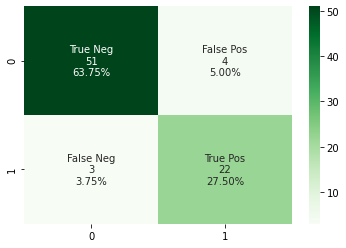

In [30]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in kc_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in kc_matrix.flatten()/np.sum(kc_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(kc_matrix, annot=labels, fmt='', cmap='Greens')

# K-Fold cross validation- K-NN- Train Set

In [31]:
Knn_accuracy_tr = cross_val_score(estimator = knnclassifier, X = x_train, y = y_train, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(Knn_accuracy_tr.mean(),Knn_accuracy_tr.std()))

Mean Accuracy: 0.90, Std of Accuracy: 0.04


# K-Fold cross validation- K-NN- Test Set

In [32]:
Knn_accuracy = cross_val_score(estimator = knnclassifier, X = x_test, y = y_test, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(Knn_accuracy.mean(),Knn_accuracy.std()))

Mean Accuracy: 0.89, Std of Accuracy: 0.13


# 3- Support Vector Machine(SVM)

In [33]:
svmclassifier = SVC(kernel = 'linear', random_state = 0)
svmclassifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

# Predicting train and test results

In [34]:
y_pred_train = svmclassifier.predict(x_train)
y_pred = svmclassifier.predict(x_test)
print(np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_pred),1)),1))

[[0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]


# Confusion Matrix, Accuracy, Classification Report - Training Set

In [35]:
svm_matrix_tr = confusion_matrix(y_train, y_pred_train)
svm_score_tr = accuracy_score(y_train, y_pred_train)
svm_cr_tr = classification_report(y_train,y_pred_train)
print("Confusion Matrix")
print(svm_matrix_tr)
print("Accuracy Score: ", svm_score_tr)
print("Classification report")
print(svm_cr_tr)

Confusion Matrix
[[187  15]
 [ 35  83]]
Accuracy Score:  0.84375
Classification report
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       202
           1       0.85      0.70      0.77       118

    accuracy                           0.84       320
   macro avg       0.84      0.81      0.83       320
weighted avg       0.84      0.84      0.84       320



# Confusion Matrix - Visualization - Train Result

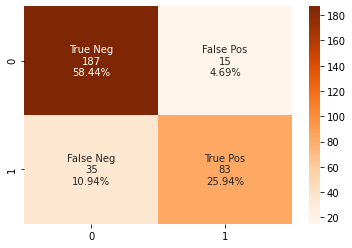

In [36]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in svm_matrix_tr.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in svm_matrix_tr.flatten()/np.sum(svm_matrix_tr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(svm_matrix_tr, annot=labels, fmt='', cmap='Oranges')

# Confusion Matrix, Accuracy, Classification Report - Test Set

In [37]:
svm_matrix = confusion_matrix(y_test, y_pred)
svm_score = accuracy_score(y_test, y_pred)
svm_cr = classification_report(y_test,y_pred)
print("Confusion Matrix")
print(svm_matrix)
print("Accuracy Score: ", svm_score)
print("Classification report")
print(svm_cr)

Confusion Matrix
[[52  3]
 [ 9 16]]
Accuracy Score:  0.85
Classification report
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        55
           1       0.84      0.64      0.73        25

    accuracy                           0.85        80
   macro avg       0.85      0.79      0.81        80
weighted avg       0.85      0.85      0.84        80



# Confusion Matrix Visualization - Test set

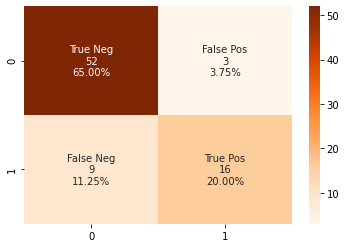

In [38]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in svm_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in svm_matrix.flatten()/np.sum(svm_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(svm_matrix, annot=labels, fmt='', cmap='Oranges')

# K-Fold cross validation- SVM - Training Set

In [39]:
svm_accuracy_tr = cross_val_score(estimator = svmclassifier, X = x_train, y = y_train, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(svm_accuracy_tr.mean(),svm_accuracy_tr.std()))

Mean Accuracy: 0.84, Std of Accuracy: 0.03


# K-Fold cross validation- SVM - Test Set

In [40]:
svm_accuracy = cross_val_score(estimator = svmclassifier, X = x_test, y = y_test, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(svm_accuracy.mean(),svm_accuracy.std()))

Mean Accuracy: 0.82, Std of Accuracy: 0.10


# 4 - Kernal SVM

In [41]:
ksvmclassifier = SVC(kernel = 'rbf', random_state = 0)
ksvmclassifier.fit(x_train, y_train)

SVC(random_state=0)

# Predicting train and test results

In [42]:
y_pred_train = ksvmclassifier.predict(x_train)
y_pred = ksvmclassifier.predict(x_test)
print(np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_pred),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]


# Confusion Matrix, Accuracy, Classification Report - Training Set

In [43]:
ksvm_matrix_tr = confusion_matrix(y_train, y_pred_train)
ksvm_score_tr = accuracy_score(y_train, y_pred_train)
ksvm_cr_tr = classification_report(y_train,y_pred_train)
print("Confusion Matrix")
print(ksvm_matrix_tr)
print("Accuracy Score: ", ksvm_score_tr)
print("Classification report")
print(ksvm_cr_tr)

Confusion Matrix
[[183  19]
 [  8 110]]
Accuracy Score:  0.915625
Classification report
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       202
           1       0.85      0.93      0.89       118

    accuracy                           0.92       320
   macro avg       0.91      0.92      0.91       320
weighted avg       0.92      0.92      0.92       320



# Confusion Matrix - Visualization - Train Result

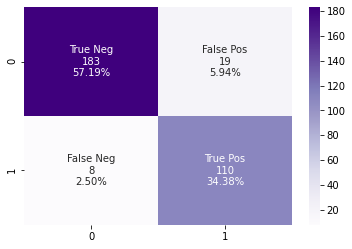

In [44]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in ksvm_matrix_tr.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in ksvm_matrix_tr.flatten()/np.sum(ksvm_matrix_tr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(ksvm_matrix_tr, annot=labels, fmt='', cmap= 'Purples')

# Confusion Matrix, Accuracy, Classification Report - Test Set

In [45]:
ksvm_matrix = confusion_matrix(y_test, y_pred)
ksvm_score = accuracy_score(y_test, y_pred)
ksvm_cr = classification_report(y_test,y_pred)
print("Confusion Matrix")
print(ksvm_matrix)
print("Accuracy Score: ", ksvm_score)
print("Classification report")
print(ksvm_cr)

Confusion Matrix
[[50  5]
 [ 3 22]]
Accuracy Score:  0.9
Classification report
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        55
           1       0.81      0.88      0.85        25

    accuracy                           0.90        80
   macro avg       0.88      0.89      0.89        80
weighted avg       0.90      0.90      0.90        80



# Confusion Matrix - Visualization - Test Result

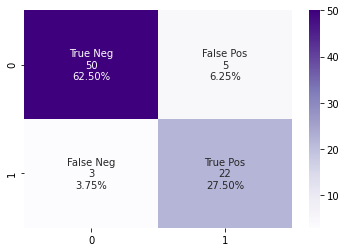

In [46]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in ksvm_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in ksvm_matrix.flatten()/np.sum(ksvm_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(ksvm_matrix, annot=labels, fmt='', cmap= 'Purples')

# K-Fold cross validation- Kernal SVM - Training Set

In [47]:
ksvm_accuracy_tr = cross_val_score(estimator = ksvmclassifier, X = x_train, y = y_train, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(ksvm_accuracy_tr.mean(),ksvm_accuracy_tr.std()))

Mean Accuracy: 0.92, Std of Accuracy: 0.05


# K-Fold cross validation- Kernal SVM - Test Set

In [48]:
ksvm_accuracy = cross_val_score(estimator = ksvmclassifier, X = x_test, y = y_test, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(ksvm_accuracy.mean(),ksvm_accuracy.std()))

Mean Accuracy: 0.88, Std of Accuracy: 0.14


# 5- Naive Bayes

In [49]:
nbclassifier = GaussianNB()
nbclassifier.fit(x_train, y_train)

GaussianNB()

# Predicting train and test results

In [50]:
y_pred_train = nbclassifier.predict(x_train)
y_pred = nbclassifier.predict(x_test)
print(np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_pred),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]


# Confusion Matrix, Accuracy, Classification Report - Training Set

In [51]:
nb_matrix_tr = confusion_matrix(y_train, y_pred_train)
nb_score_tr = accuracy_score(y_train, y_pred_train)
nb_cr_tr = classification_report(y_train,y_pred_train)
print("Confusion Matrix")
print(nb_matrix_tr)
print("Accuracy Score: ", nb_score_tr)
print("Classification report")
print(nb_cr_tr)

Confusion Matrix
[[187  15]
 [ 19  99]]
Accuracy Score:  0.89375
Classification report
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       202
           1       0.87      0.84      0.85       118

    accuracy                           0.89       320
   macro avg       0.89      0.88      0.89       320
weighted avg       0.89      0.89      0.89       320



# Confusion Matrix - Visualization - Train Result

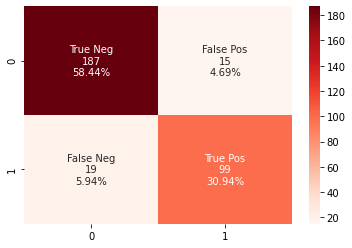

In [52]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in nb_matrix_tr.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in nb_matrix_tr.flatten()/np.sum(nb_matrix_tr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(nb_matrix_tr, annot=labels, fmt='', cmap='Reds')

# Confusion Matrix, Accuracy, Classification Report - Test Set

In [53]:
nb_matrix = confusion_matrix(y_test, y_pred)
nb_score = accuracy_score(y_test, y_pred)
nb_cr = classification_report(y_test,y_pred)
print("Confusion Matrix")
print(nb_matrix)
print("Accuracy Score: ", nb_score)
print("Classification report")
print(nb_cr)

Confusion Matrix
[[52  3]
 [ 6 19]]
Accuracy Score:  0.8875
Classification report
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        55
           1       0.86      0.76      0.81        25

    accuracy                           0.89        80
   macro avg       0.88      0.85      0.86        80
weighted avg       0.89      0.89      0.89        80



# Confusion Matrix - Visualization - Test Result

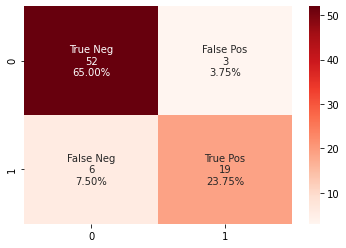

In [54]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in nb_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in nb_matrix.flatten()/np.sum(nb_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(nb_matrix, annot=labels, fmt='', cmap='Reds')

# K-Fold cross validation- Naive Bayes - Training Set

In [55]:
nb_accuracy_tr = cross_val_score(estimator = nbclassifier, X = x_train, y = y_train, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(nb_accuracy_tr.mean(),nb_accuracy_tr.std()))

Mean Accuracy: 0.89, Std of Accuracy: 0.03


# K-Fold cross validation- Naive Bayes - Test Set

In [56]:
nb_accuracy = cross_val_score(estimator = nbclassifier, X = x_test, y = y_test, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(nb_accuracy.mean(),nb_accuracy.std()))

Mean Accuracy: 0.85, Std of Accuracy: 0.12


# 6- Decision Tree Classification

In [57]:
dtclassifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state = 0)
dtclassifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Predicting train and test results

In [58]:
y_pred_train = dtclassifier.predict(x_train)
y_pred = dtclassifier.predict(x_test)
print(np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_pred),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]


# Confusion Matrix, Accuracy, Classification Report - Training Set

In [59]:
dt_matrix_tr = confusion_matrix(y_train, y_pred_train)
dt_score_tr = accuracy_score(y_train, y_pred_train)
dt_cr_tr = classification_report(y_train,y_pred_train)
print("Confusion Matrix")
print(dt_matrix_tr)
print("Accuracy Score: ", dt_score_tr)
print("Classification report")
print(dt_cr_tr)

Confusion Matrix
[[182  20]
 [  6 112]]
Accuracy Score:  0.91875
Classification report
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       202
           1       0.85      0.95      0.90       118

    accuracy                           0.92       320
   macro avg       0.91      0.93      0.91       320
weighted avg       0.92      0.92      0.92       320



# Confusion Matrix - Visualization - Train Result

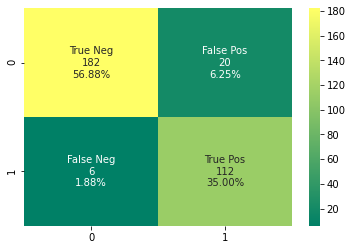

In [60]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in dt_matrix_tr.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in dt_matrix_tr.flatten()/np.sum(dt_matrix_tr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(dt_matrix_tr, annot=labels, fmt='', cmap='summer')

# Confusion Matrix, Accuracy, Classification Report - Test Set

In [61]:
dt_matrix = confusion_matrix(y_test, y_pred)
dt_score = accuracy_score(y_test, y_pred)
dt_cr = classification_report(y_test,y_pred)
print("Confusion Matrix")
print(dt_matrix)
print("Accuracy Score: ", dt_score)
print("Classification report")
print(dt_cr)

Confusion Matrix
[[50  5]
 [ 3 22]]
Accuracy Score:  0.9
Classification report
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        55
           1       0.81      0.88      0.85        25

    accuracy                           0.90        80
   macro avg       0.88      0.89      0.89        80
weighted avg       0.90      0.90      0.90        80



# Confusion Matrix - Visualization - Test Result

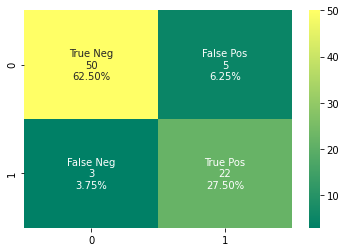

In [62]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in dt_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in dt_matrix.flatten()/np.sum(dt_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(dt_matrix, annot=labels, fmt='', cmap='summer')

# 6 -  Random Forest Classification

In [63]:
rfclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfclassifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

# Predicting train and test results

In [64]:
y_pred_train = rfclassifier.predict(x_train)
y_pred = rfclassifier.predict(x_test)
print(np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_pred),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]


# Confusion Matrix, Accuracy, Classification Report - Training Set

In [65]:
rfc_matrix_tr = confusion_matrix(y_train, y_pred_train)
rfc_score_tr = accuracy_score(y_train, y_pred_train)
rfc_cr_tr = classification_report(y_train,y_pred_train)
print("Confusion Matrix")
print(rfc_matrix_tr)
print("Accuracy Score: ", rfc_score_tr)
print("Classification report")
print(rfc_cr_tr)

Confusion Matrix
[[199   3]
 [  3 115]]
Accuracy Score:  0.98125
Classification report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       202
           1       0.97      0.97      0.97       118

    accuracy                           0.98       320
   macro avg       0.98      0.98      0.98       320
weighted avg       0.98      0.98      0.98       320



# Confusion Matrix - Visualization - Train Result

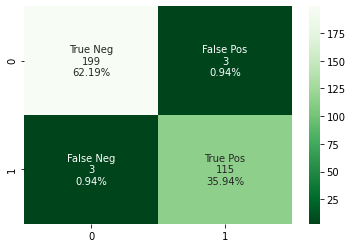

In [66]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in rfc_matrix_tr.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in rfc_matrix_tr.flatten()/np.sum(rfc_matrix_tr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(rfc_matrix_tr, annot=labels, fmt='', cmap='Greens_r')

# Confusion Matrix, Accuracy, Classification Report - Test Set

In [67]:
rfc_matrix = confusion_matrix(y_test, y_pred)
rfc_score = accuracy_score(y_test, y_pred)
rfc_cr = classification_report(y_test,y_pred)
print("Confusion Matrix")
print(rfc_matrix)
print("Accuracy Score: ", rfc_score)
print("Classification report")
print(rfc_cr)

Confusion Matrix
[[52  3]
 [ 4 21]]
Accuracy Score:  0.9125
Classification report
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        55
           1       0.88      0.84      0.86        25

    accuracy                           0.91        80
   macro avg       0.90      0.89      0.90        80
weighted avg       0.91      0.91      0.91        80



# Confusion Matrix - Visualization - Test Result

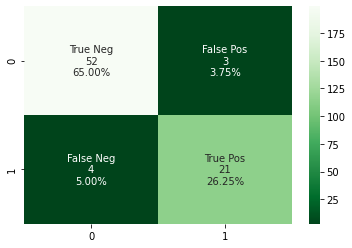

In [68]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in rfc_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in rfc_matrix.flatten()/np.sum(rfc_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(rfc_matrix_tr, annot=labels, fmt='', cmap='Greens_r')

# K-Fold cross validation- Random Forest - Training Set

In [69]:
rf_accuracy_tr = cross_val_score(estimator = rfclassifier, X = x_train, y = y_train, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(rf_accuracy_tr.mean(),rf_accuracy_tr.std()))

Mean Accuracy: 0.88, Std of Accuracy: 0.03


# K-Fold cross validation- Random Forest - Test Set

In [70]:
rf_accuracy = cross_val_score(estimator = rfclassifier, X = x_test, y = y_test, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(rf_accuracy.mean(),rf_accuracy.std()))

Mean Accuracy: 0.84, Std of Accuracy: 0.13
